In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
startupData = pd.read_csv('50_Startups.csv')

### 1. Correlation Test


#### 1. Pearson's Correlation Test
Question 1: Lets Test whether R&DSpend and Profit have a linear Relationship or not?
Hypothesis Testing for Question 1:

- Null Hypothesis (H0) = R&D Spend and Profit has no linear relationship
- Alternate Hypothesis (H1) = R&DSpend and Profit has linear relationship

Which Test to perform?
- Pearson's Correlation Test

What Significance Level(How much errors you can tolerate) you are looking for?
<br />Ideally most of the statistician follow the below 3 rules:
1. 0.01 error (1% error)
2. 0.05 error (5% error) (Practically considered ideal value for SL)
3. 0.1 error  (10% error)
- In the world of Statistics , Significance Level is denoted by 'p-value'.

Things that you must be aware of?
1. Identify which test you will perform
2. Create Null and Alternate Hypothesis
3. Set p-value
4. Perform test

In [3]:
#Scipy ---> Scientific Python ---> All formulaes related to math and stats to be applied
#Acceptable p-value for my hypothesis is 0.05
from scipy.stats import pearsonr
correlation,pvalue = pearsonr(startupData['R&D Spend'] , startupData['Profit'])
print(correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - Administration and Profit has linear relationship")
else:
    print("Null Hypothesis (H0)- Administration and Profit has no linear relationship")

0.9729004656594831
3.5003222436906035e-32
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - Administration and Profit has linear relationship


In [5]:
correlation,pvalue = pearsonr(startupData['R&D Spend'], startupData['Profit'])
if pvalue <= 0.05:
    print("+ive correlation between R&D Spend and Profit")
else:
    print("-ive correlation between R&D Spend and Profit")

+ive correlation between R&D Spend and Profit


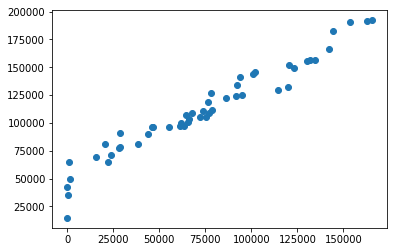

In [4]:
#Do the remaining correlation test for Marketing and Administration
plt.scatter(startupData['R&D Spend'] , startupData['Profit'])

Question 1: Lets Test whether R&DSpend and Profit have a linear Relationship or not?
Hypothesis Testing for Question 1:

- Null Hypothesis (H0) = R&D Spend and Profit has no monotonic relationship
- Alternate Hypothesis (H1) = R&DSpend and Profit has monotonic relationship

Which Test to perform?
- Spearman's Rank Test

What Significance Level(How much errors you can tolerate) you are looking for?
<br />Ideally most of the statistician follow the below 3 rules:
1. 0.01 error (1% error)
2. 0.05 error (5% error) (Practically considered ideal value for SL)
3. 0.1 error  (10% error)
- In the world of Statistics , Significance Level is denoted by 'p-value'.

Things that you must be aware of?
1. Identify which test you will perform
2. Create Null and Alternate Hypothesis
3. Set p-value as 0.05
4. Perform test

In [23]:
#Spearmans Rank Test
from scipy.stats import spearmanr
correlation,pvalue = spearmanr(startupData['R&D Spend'] , startupData['Profit'])
print(correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - R&DSpend and Profit has monotonic relationship")
else:
    print("Null Hypothesis (H0)- R&D Spend and Profit has no monotonic relationship")

0.9898436940114568
2.4924463031107535e-42
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - R&DSpend and Profit has monotonic relationship


In [24]:
#Kendall's Rank Test
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(startupData['R&D Spend'] , startupData['Profit'])
print(correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - R&DSpend and Profit has monotonic relationship")
else:
    print("Null Hypothesis (H0)- R&D Spend and Profit has no monotonic relationship")

0.9342589590620481
1.0718305105857118e-21
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - R&DSpend and Profit has monotonic relationship


# Chi-square Test

In [15]:
contigency_table = pd.crosstab(startupData['State'],startupData['Profit'])

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)
if p <= 0.05:
    print("Alternate Hypothesis (H1): State and Profit have some form of relationship.")
else:
    print("Null Hypothesis(H0): State and Profit are independent of each other.")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis(H0): State and Profit are independent of each other.
Confidence Level : 57.513332179723406 %


# Normality Test 

In [7]:
startupData

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
from scipy.stats import shapiro
stat,p = shapiro(startupData['R&D Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1): R&D Spend is Normally distributed")
else:
    print("Null Hypothesis (H0) : R&D Spend is not Normal Distribution")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis (H0) : R&D Spend is not Normal Distribution
Confidence Level : 81.99481666088104 %


In [29]:
from scipy.stats import anderson
stat = anderson(startupData['R&D Spend'])
print(stat)

AndersonResult(statistic=0.3544189646662659, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [30]:
from scipy.stats import normaltest
stat,p = normaltest(startupData['R&D Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1): R&D Spend is Normally distributed")
else:
    print("Null Hypothesis (H0) : R&D Spend is not Normal Distribution")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis (H0) : R&D Spend is not Normal Distribution
Confidence Level : 71.75346439553687 %


In [32]:
from scipy.stats import shapiro
stat,p = shapiro(startupData['Administration'])
if p <= 0.05:
    print("Alternate Hypothesis (H1): R&D Spend is Normally distributed")
else:
    print("Null Hypothesis (H0) : R&D Spend is not Normal Distribution")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis (H0) : R&D Spend is not Normal Distribution
Confidence Level : 76.33925676345825 %


In [33]:
from scipy.stats import shapiro
stat,p = shapiro(startupData['Marketing Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1): R&D Spend is Normally distributed")
else:
    print("Null Hypothesis (H0) : R&D Spend is not Normal Distribution")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis (H0) : R&D Spend is not Normal Distribution
Confidence Level : 65.49227833747864 %


# Non-parametric Test

In [10]:
# Wilcoxon Test
from scipy.stats import wilcoxon
stat,p = wilcoxon(startupData['R&D Spend'], startupData['Administration'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.99996458891725 %


In [35]:
#Mann-Whitney U test
from scipy.stats import mannwhitneyu
stat,p = mannwhitneyu(startupData['R&D Spend'], startupData['Administration'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.99998810170587 %


In [11]:
#Kruskal-Wallis H-test
from scipy.stats import kruskal
stat,p = kruskal(startupData['R&D Spend'], startupData['Administration'], startupData['Marketing Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))
print(stat)

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.99999999677547 %
48.315296761518745


In [5]:
#Friedman Test
from scipy.stats import friedmanchisquare
stat,p = friedmanchisquare(startupData['R&D Spend'], startupData['Administration'], startupData['Marketing Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.9999999961288 %


# Parametric Test
Note: The below code is for making you understand how to implement parametric test. 

In [40]:
#Student t-test
from scipy.stats import ttest_ind
stat,p = ttest_ind(startupData['R&D Spend'], startupData['Administration'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.9999989883414 %


In [41]:
#Paired Student t-test
from scipy.stats import ttest_rel
stat,p = ttest_rel(startupData['R&D Spend'], startupData['Administration'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.99999948019163 %


In [7]:
#ANOVA
from scipy.stats import f_oneway
stat,p = f_oneway(startupData['R&D Spend'], startupData['Administration'], startupData['Marketing Spend'])
if p <= 0.05:
    print("Alternate Hypothesis (H1) --> Columns are unequal(different)")
else:
    print("Null Hypothesis (H0) --> Columns are equal")
print("Confidence Level : {} %".format(((1- p)*100)))

Alternate Hypothesis (H1) --> Columns are unequal(different)
Confidence Level : 99.99999999999922 %
